<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Purpose" data-toc-modified-id="Purpose-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Purpose</a></span></li><li><span><a href="#Imports-and-housekeeping" data-toc-modified-id="Imports-and-housekeeping-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Imports and housekeeping</a></span></li><li><span><a href="#Explore" data-toc-modified-id="Explore-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Explore</a></span></li><li><span><a href="#Annotations" data-toc-modified-id="Annotations-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Annotations</a></span></li><li><span><a href="#Images" data-toc-modified-id="Images-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Images</a></span><ul class="toc-item"><li><span><a href="#Openning-images" data-toc-modified-id="Openning-images-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Openning images</a></span><ul class="toc-item"><li><span><a href="#Image-1" data-toc-modified-id="Image-1-5.1.1"><span class="toc-item-num">5.1.1&nbsp;&nbsp;</span>Image 1</a></span></li><li><span><a href="#Image-2" data-toc-modified-id="Image-2-5.1.2"><span class="toc-item-num">5.1.2&nbsp;&nbsp;</span>Image 2</a></span></li><li><span><a href="#Image-3" data-toc-modified-id="Image-3-5.1.3"><span class="toc-item-num">5.1.3&nbsp;&nbsp;</span>Image 3</a></span></li><li><span><a href="#Image-4" data-toc-modified-id="Image-4-5.1.4"><span class="toc-item-num">5.1.4&nbsp;&nbsp;</span>Image 4</a></span></li><li><span><a href="#Image-5" data-toc-modified-id="Image-5-5.1.5"><span class="toc-item-num">5.1.5&nbsp;&nbsp;</span>Image 5</a></span></li></ul></li></ul></li><li><span><a href="#Next-Steps" data-toc-modified-id="Next-Steps-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Next Steps</a></span></li></ul></div>

# Purpose

The following code constructs bounding boxes around five images downloaded from https://mars.nasa.gov/

**GOAL**: to create basic method that can be used to draw bounding boxes around objects of interest.

Bounding box JSON file data not shown here. JSON bbox data created using inhouse application.


# Imports and housekeeping

In [55]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [56]:
from fastai.conv_learner import *
from fastai.dataset import *

from pathlib import Path
import json
from PIL import ImageDraw, ImageFont
from matplotlib import patches, patheffects
#torch.cuda.set_device(1)

# Explore

In [57]:
PATH = Path('images/annotations')
list(PATH.iterdir())

[PosixPath('images/annotations/21_The_Serpent_Dust_Devil_on_Mars_PIA15116_5.xml'),
 PosixPath('images/annotations/Mars-MRO-orbiter-banded-wind-ridges-iapygia_4.xml'),
 PosixPath('images/annotations/Mars-MRO-orbiter-curiosity-rover-trek_1.xml'),
 PosixPath('images/annotations/MRO-active-mars-landslide_2.xml'),
 PosixPath('images/annotations/MRO-HIRISE-Mars-Jezero-Crater-Mars2020-Possbile-Landing-Site-PIA19303_3.xml'),
 PosixPath('images/annotations/temp6.json')]

In [58]:
PATH.iterdir()

<generator object Path.iterdir at 0x10f5df728>

In [59]:
# Example of the PATH.iterdir()
for i in PATH.iterdir(): print(i)

images/annotations/21_The_Serpent_Dust_Devil_on_Mars_PIA15116_5.xml
images/annotations/Mars-MRO-orbiter-banded-wind-ridges-iapygia_4.xml
images/annotations/Mars-MRO-orbiter-curiosity-rover-trek_1.xml
images/annotations/MRO-active-mars-landslide_2.xml
images/annotations/MRO-HIRISE-Mars-Jezero-Crater-Mars2020-Possbile-Landing-Site-PIA19303_3.xml
images/annotations/temp6.json


In [60]:
[i for i in PATH.iterdir()]

[PosixPath('images/annotations/21_The_Serpent_Dust_Devil_on_Mars_PIA15116_5.xml'),
 PosixPath('images/annotations/Mars-MRO-orbiter-banded-wind-ridges-iapygia_4.xml'),
 PosixPath('images/annotations/Mars-MRO-orbiter-curiosity-rover-trek_1.xml'),
 PosixPath('images/annotations/MRO-active-mars-landslide_2.xml'),
 PosixPath('images/annotations/MRO-HIRISE-Mars-Jezero-Crater-Mars2020-Possbile-Landing-Site-PIA19303_3.xml'),
 PosixPath('images/annotations/temp6.json')]

In [61]:
list(PATH.iterdir())

[PosixPath('images/annotations/21_The_Serpent_Dust_Devil_on_Mars_PIA15116_5.xml'),
 PosixPath('images/annotations/Mars-MRO-orbiter-banded-wind-ridges-iapygia_4.xml'),
 PosixPath('images/annotations/Mars-MRO-orbiter-curiosity-rover-trek_1.xml'),
 PosixPath('images/annotations/MRO-active-mars-landslide_2.xml'),
 PosixPath('images/annotations/MRO-HIRISE-Mars-Jezero-Crater-Mars2020-Possbile-Landing-Site-PIA19303_3.xml'),
 PosixPath('images/annotations/temp6.json')]

Lets just grab one:

In [62]:
o = list(PATH.iterdir())[0]
o

PosixPath('images/annotations/21_The_Serpent_Dust_Devil_on_Mars_PIA15116_5.xml')

In [63]:
trn_j = json.load((PATH/'temp6.json').open())
trn_j.keys()

dict_keys(['data', 'categories', 'images'])

`trn_j`: loaded json file called 'temp6.json', which contain, not the images, but a dictionary with the bounding boxes and classes of the objects.

In [64]:
DATA,CATEGORIES,IMAGES,BBOX,ID,FILE_NAME = ['data', 'categories', 'images', 'coordinates', 'id', 'file_name']

# Reuturn all JSON "images" data
trn_j[IMAGES][:]

[{'file_name': 'Mars-MRO-orbiter-curiosity-rover-trek_1.jpg', 'id': 1},
 {'file_name': 'MRO-active-mars-landslide_2.jpg', 'id': 2},
 {'file_name': 'MRO-HIRISE-Mars-Jezero-Crater-Mars2020-Possbile-Landing-Site-PIA19303_3.jpg',
  'id': 3},
 {'file_name': 'Mars-MRO-orbiter-banded-wind-ridges-iapygia_4.jpg', 'id': 4},
 {'file_name': '21_The_Serpent_Dust_Devil_on_Mars_PIA15116_5.jpg', 'id': 5}]

# Annotations
- `bbox`: the bound box dimensions = x,y (TOP LEFT), and its width, height: `[x,y,w,h]`
- `segmentation`: polygon segmentation. We are not using this.
- `ignore`: we are ignoring the ignore flag most of the time
- `iscrowd`: crowd of that object. I.e., not just one of them.

In [65]:
# Reuturn all JSON "DATA" data
trn_j[DATA][:]

[{'coordinates': [191, 1050, 10, 12],
  'id': 1,
  'label': 'rover',
  'type': 'rectangle'},
 {'coordinates': [350, 142, 44, 45],
  'id': 2,
  'label': 'avalanche',
  'type': 'rectangle'},
 {'coordinates': [92, 100, 2702, 1616],
  'id': 3,
  'label': 'landingsite',
  'type': 'rectangle'},
 {'coordinates': [1012, 1051, 738, 454],
  'id': 4,
  'label': 'windridge',
  'type': 'rectangle'},
 {'coordinates': [257, 557, 1150, 394],
  'id': 5,
  'label': 'Serpent',
  'type': 'rectangle'}]

In [66]:
# Pull the 0'th bbox.
bb0 = trn_j[DATA][0][BBOX]
bb0

[191, 1050, 10, 12]

In [67]:
# Pull 2nd-th element from the bbox
bb0[2]

10

In [68]:
# Show all 4 categories
trn_j[CATEGORIES][:]

[{'id': 1, 'name': 'rover'},
 {'id': 2, 'name': 'avalanche'},
 {'id': 3, 'name': 'landingsite'},
 {'id': 4, 'name': 'windridge'},
 {'id': 5, 'name': 'Serpent'}]

In [69]:
cats = dict((o[ID], o['name']) for o in trn_j[CATEGORIES])

In [70]:
# Display category IDS and their respective categories
cats

{1: 'rover', 2: 'avalanche', 3: 'landingsite', 4: 'windridge', 5: 'Serpent'}

In [71]:
# Display training file names and their respecitve IDs
trn_fns = dict((o[ID], o[FILE_NAME]) for o in trn_j[IMAGES])

In [72]:
trn_fns

{1: 'Mars-MRO-orbiter-curiosity-rover-trek_1.jpg',
 2: 'MRO-active-mars-landslide_2.jpg',
 3: 'MRO-HIRISE-Mars-Jezero-Crater-Mars2020-Possbile-Landing-Site-PIA19303_3.jpg',
 4: 'Mars-MRO-orbiter-banded-wind-ridges-iapygia_4.jpg',
 5: '21_The_Serpent_Dust_Devil_on_Mars_PIA15116_5.jpg'}

In [73]:
trn_ids = [o[ID] for o in trn_j[IMAGES]]

In [74]:
trn_ids

[1, 2, 3, 4, 5]

- `cats`: We now wanna turn the categoires list into a dictionary from ID to name
- `trn_fns`: create a dictionary from ID to name of the image file names
- `trn_ids`: create a list of all of the images IDs just to make life easier.

In [75]:
# Show first 2 key value paiers in cats
{k: cats[k] for k in sorted(cats.keys())[:2]}

{1: 'rover', 2: 'avalanche'}

In [76]:
# Show first 2 key value paiers in trn_fns
{k: trn_fns[k] for k in sorted(trn_fns.keys())[:2]}

{1: 'Mars-MRO-orbiter-curiosity-rover-trek_1.jpg',
 2: 'MRO-active-mars-landslide_2.jpg'}

In [77]:
# Show first 2 IDs
trn_ids[0:2]

[1, 2]

In [78]:
PATH = Path('images')
list(PATH.iterdir())

[PosixPath('images/.DS_Store'),
 PosixPath('images/21_The_Serpent_Dust_Devil_on_Mars_PIA15116_5.jpg'),
 PosixPath('images/annotations'),
 PosixPath('images/JPEGImages'),
 PosixPath('images/Mars-MRO-orbiter-banded-wind-ridges-iapygia_4.jpg'),
 PosixPath('images/Mars-MRO-orbiter-curiosity-rover-trek_1.jpg'),
 PosixPath('images/MRO-active-mars-landslide_2.jpg'),
 PosixPath('images/MRO-HIRISE-Mars-Jezero-Crater-Mars2020-Possbile-Landing-Site-PIA19303_3.jpg')]

# Images

In [79]:
list(PATH.iterdir())

[PosixPath('images/.DS_Store'),
 PosixPath('images/21_The_Serpent_Dust_Devil_on_Mars_PIA15116_5.jpg'),
 PosixPath('images/annotations'),
 PosixPath('images/JPEGImages'),
 PosixPath('images/Mars-MRO-orbiter-banded-wind-ridges-iapygia_4.jpg'),
 PosixPath('images/Mars-MRO-orbiter-curiosity-rover-trek_1.jpg'),
 PosixPath('images/MRO-active-mars-landslide_2.jpg'),
 PosixPath('images/MRO-HIRISE-Mars-Jezero-Crater-Mars2020-Possbile-Landing-Site-PIA19303_3.jpg')]

In [80]:
JPEGS = 'JPEGImages'

In [81]:
# Show first two images
IMG_PATH = PATH/JPEGS
list(IMG_PATH.iterdir())[:4]

[PosixPath('images/JPEGImages/21_The_Serpent_Dust_Devil_on_Mars_PIA15116_5.jpg'),
 PosixPath('images/JPEGImages/Mars-MRO-orbiter-banded-wind-ridges-iapygia_4.jpg'),
 PosixPath('images/JPEGImages/Mars-MRO-orbiter-curiosity-rover-trek_1.jpg'),
 PosixPath('images/JPEGImages/MRO-active-mars-landslide_2.jpg')]

Each image has a unique ID.

In [82]:
im0_d = trn_j[IMAGES][0]
im0_d[FILE_NAME],im0_d[ID]

('Mars-MRO-orbiter-curiosity-rover-trek_1.jpg', 1)

In [83]:
im0_d

{'file_name': 'Mars-MRO-orbiter-curiosity-rover-trek_1.jpg', 'id': 1}

What we want to do is to create a dictionary where the key is the image ID and the value is a list of all of its annotations:

In [84]:
trn_anno = collections.defaultdict(lambda:[])
for o in trn_j[DATA]:
        bb = o[BBOX]
        bb = np.array([bb[1], bb[0], bb[3]+bb[1]-1, bb[2]+bb[0]-1])
        trn_anno[o[ID]].append((bb,o[ID]))
        
len(trn_anno)

5

In [85]:
trn_anno

defaultdict(<function __main__.<lambda>>,
            {1: [(array([1050,  191, 1061,  200]), 1)],
             2: [(array([142, 350, 186, 393]), 2)],
             3: [(array([ 100,   92, 1715, 2793]), 3)],
             4: [(array([1051, 1012, 1504, 1749]), 4)],
             5: [(array([ 557,  257,  950, 1406]), 5)]})

Below is example that looks up the dictionary for the first image's anotations (in this case a bbox) and class:

In [86]:
im_a = trn_anno[im0_d[ID]]; im_a

[(array([1050,  191, 1061,  200]), 1)]

In [87]:
im0_a = im_a[0]; im0_a

(array([1050,  191, 1061,  200]), 1)

In [88]:
cats[4]

'windridge'

In [89]:
trn_anno[4]

[(array([1051, 1012, 1504, 1749]), 4)]

`trn_anno[4]`: this is image 4. It has one bounding boxes of type 4

In [90]:
cats[4]

'windridge'

## Openning images

Above, we turned our height and width into top left and bottom right, below method does the exact opposite. This is because some libs expect VOC format bounding boxes, so this let's convert back when required:

In [91]:
# Function that converts bounding box to a height and width. Bring back to PASCAL standard
def bb_hw(a): return np.array([a[1],a[0],a[3]-a[1],a[2]-a[0]])

In [92]:
IMG_PATH

PosixPath('images/JPEGImages')

In [93]:
im0_d[FILE_NAME]

'Mars-MRO-orbiter-curiosity-rover-trek_1.jpg'

In [94]:
'images/JPEGImages/4D_Flow_1.jpg'

'images/JPEGImages/4D_Flow_1.jpg'

In [95]:
IMG_PATH

PosixPath('images/JPEGImages')

In [96]:
im0_d[FILE_NAME]

'Mars-MRO-orbiter-curiosity-rover-trek_1.jpg'

In [97]:
def open_image(fn):
    """ Opens an image using OpenCV given the file path. From fast.ai library mod dataset.py

    Arguments:
        fn: the file path of the image

    Returns:
        The image in RGB format as numpy array of floats normalized to range between 0.0 - 1.0
    """
    flags = cv2.IMREAD_UNCHANGED+cv2.IMREAD_ANYDEPTH+cv2.IMREAD_ANYCOLOR
    if not os.path.exists(fn):
        raise OSError('No such file or directory: {}'.format(fn))
    elif os.path.isdir(fn):
        raise OSError('Is a directory: {}'.format(fn))
    else:
        #res = np.array(Image.open(fn), dtype=np.float32)/255
        #if len(res.shape)==2: res = np.repeat(res[...,None],3,2)
        #return res
        try:
            im = cv2.imread(str(fn), flags).astype(np.float32)/255
            if im is None: raise OSError(f'File not recognized by opencv: {fn}')
            return cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
        except Exception as e:
            raise OSError('Error handling image at: {}'.format(fn)) from e

In [98]:
# Use if you have function above. Otherwise use uncomment and run next line.
im1 = open_image(IMG_PATH/im0_d[FILE_NAME])
#im1 = open_image('Mars-MRO-orbiter-curiosity-rover-trek_1.jpg')

In [110]:
IMG_PATH

PosixPath('images/JPEGImages')

In [112]:
im0_d

{'file_name': 'Mars-MRO-orbiter-curiosity-rover-trek_1.jpg', 'id': 1}

Matplotlib's `plt.subplots` is a really useful wrapper for creating plots, regardless of whether you have more than one subplot. Note that Matplotlib has an optional object-oriented API which I think is much easier to understand and use (although few examples online use it!)

Can use subplots to compare multiple plots next to each other.

In [99]:
def show_img(im, figsize=None, ax=None):
    if not ax: fig,ax = plt.subplots(figsize=figsize)
    ax.imshow(im)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    return ax

A simple but rarely used trick to making text visible regardless of background is to use white text with black outline, or visa versa. Here's how to do it in matplotlib.

In [100]:
def draw_outline(o, lw):
    o.set_path_effects([patheffects.Stroke(
        linewidth=lw, foreground='black'), patheffects.Normal()])

Note that `*` in argument lists is the [splat operator](https://stackoverflow.com/questions/5239856/foggy-on-asterisk-in-python). In this case it's a little shortcut compared to writing out `b[-2],b[-1]`.

In [101]:
def draw_rect(ax, b):
    patch = ax.add_patch(patches.Rectangle(b[:2], *b[-2:], fill=False, edgecolor='white', lw=2))
    draw_outline(patch, 4)

`patch`: add a rectangle object and pass that to `draw_outline` function. matplotlib call this rectangle a patch.

In [102]:
def draw_text(ax, xy, txt, sz=14):
    text = ax.text(*xy, txt,
        verticalalignment='top', color='white', fontsize=sz, weight='bold')
    draw_outline(text, 1)

draw_text: function to draw text and draw outline around it draw_outline(text, 1)

### Image 1

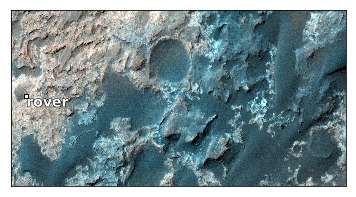

In [103]:
ax = show_img(im1)
b = bb_hw(im0_a[0])
draw_rect(ax, b)
draw_text(ax, b[:2], cats[im0_a[1]])

- `ax`: `show_img` returns the axis that the image is on
- `b = bb_hw(im0_a[0])`: turn my bounding box into hight and width
- `draw_rect`: draw the rectangle
- `draw_text`: draw the text. `b[:2]` is the top left, and `cats[im0_a[1]` is the class

### Image 2

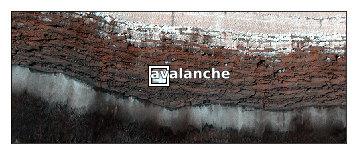

In [116]:
im1_d = trn_j[IMAGES][1]
im2 = open_image(IMG_PATH/im1_d[FILE_NAME])
im_a = trn_anno[im1_d[ID]]
im0_a = im_a[0]

ax = show_img(im2)
b = bb_hw(im0_a[0])
draw_rect(ax, b)
draw_text(ax, b[:2], cats[im0_a[1]])

### Image 3

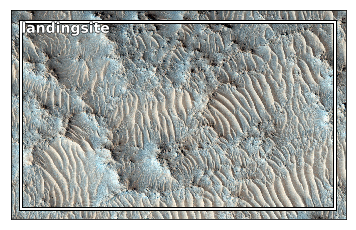

In [117]:
im2_d = trn_j[IMAGES][2]
im3 = open_image(IMG_PATH/im2_d[FILE_NAME])
im_a = trn_anno[im2_d[ID]]
im0_a = im_a[0]

ax = show_img(im3)
b = bb_hw(im0_a[0])
draw_rect(ax, b)
draw_text(ax, b[:2], cats[im0_a[1]])

### Image 4

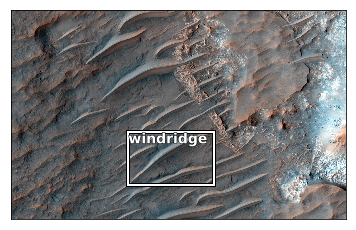

In [118]:
im3_d = trn_j[IMAGES][3]
im4 = open_image(IMG_PATH/im3_d[FILE_NAME])
im_a = trn_anno[im3_d[ID]]
im0_a = im_a[0]

ax = show_img(im4)
b = bb_hw(im0_a[0])
draw_rect(ax, b)
draw_text(ax, b[:2], cats[im0_a[1]])

### Image 5

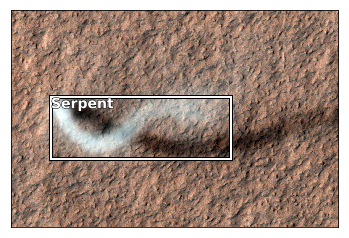

In [119]:
im4_d = trn_j[IMAGES][4]
im5 = open_image(IMG_PATH/im4_d[FILE_NAME])
im_a = trn_anno[im4_d[ID]]
im0_a = im_a[0]

ax = show_img(im5)
b = bb_hw(im0_a[0])
draw_rect(ax, b)
draw_text(ax, b[:2], cats[im0_a[1]])

# Next Steps

1. Download more images (and their descriptions)
2. Develop bounding boxes around objects of interest.
3. Develop deep learning computer vision model(s) to learn objects of interest.
4. Evaluate accuracy and/or confusion matrices for false positives and false negatives.